<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-objectives" data-toc-modified-id="Learning-objectives-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Learning objectives</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#The-context-module-(repeated-from-10-pandas1)" data-toc-modified-id="The-context-module-(repeated-from-10-pandas1)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The context module (repeated from 10-pandas1)</a></span></li><li><span><a href="#Reading-the-processed-data" data-toc-modified-id="Reading-the-processed-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Reading the processed data</a></span></li><li><span><a href="#Metadata-is-data-about-data" data-toc-modified-id="Metadata-is-data-about-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Metadata is data about data</a></span></li><li><span><a href="#Read-weather_YVR.csv-into-a-dataframe" data-toc-modified-id="Read-weather_YVR.csv-into-a-dataframe-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Read weather_YVR.csv into a dataframe</a></span><ul class="toc-item"><li><span><a href="#Handling-missing-data" data-toc-modified-id="Handling-missing-data-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Handling missing data</a></span></li></ul></li><li><span><a href="#Use-apply-to-tag-the-29,190-days-with-their-season" data-toc-modified-id="Use-apply-to-tag-the-29,190-days-with-their-season-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Use apply to tag the 29,190 days with their season</a></span><ul class="toc-item"><li><span><a href="#creating-a-new-column-with-apply" data-toc-modified-id="creating-a-new-column-with-apply-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>creating a new column with apply</a></span></li></ul></li><li><span><a href="#Grouping-the-data-by-season" data-toc-modified-id="Grouping-the-data-by-season-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Grouping the data by season</a></span><ul class="toc-item"><li><span><a href="#Use-a-dictionary-comprehension-put-the-dataframes-into-a-dictionary" data-toc-modified-id="Use-a-dictionary-comprehension-put-the-dataframes-into-a-dictionary-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Use a dictionary comprehension put the dataframes into a dictionary</a></span></li></ul></li><li><span><a href="#Fitting-the-distributions" data-toc-modified-id="Fitting-the-distributions-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Fitting the distributions</a></span><ul class="toc-item"><li><span><a href="#Daily-average-temperature" data-toc-modified-id="Daily-average-temperature-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Daily average temperature</a></span></li><li><span><a href="#Daily-average-total-precipitation" data-toc-modified-id="Daily-average-total-precipitation-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Daily average total precipitation</a></span></li></ul></li><li><span><a href="#Saving-the-fit-parameters" data-toc-modified-id="Saving-the-fit-parameters-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Saving the fit parameters</a></span></li><li><span><a href="#Grouping-by-decade" data-toc-modified-id="Grouping-by-decade-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Grouping by decade</a></span></li><li><span><a href="#Finding-the-median-temperature" data-toc-modified-id="Finding-the-median-temperature-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Finding the median temperature</a></span></li><li><span><a href="#Assignment" data-toc-modified-id="Assignment-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Assignment</a></span></li></ul></div>

# Analyzing precip and temperature data

## Learning objectives

1. Document your project data by capturing important information
   as metadata in a json file

1. Use the groupby method for a pandas dataframe to group observations
   by season

1. Find the probability density function (histogram) of temperature and
   precipitation data and determine possible statistical models (normal distribution,
   exponential distribution) that best describe the variation in the data

1. Find best fit parameters for statistical models that describe the precipitation
   and temperature data, assuming that temperature and precipitation are
   independent of each other.

1. Use groupby to find the median temperature for each decade and each season
   and determine whether the seasonal temperatures have increased at YVR
   since the 1930's

## Introduction

We have about 30,000 days worth of YVR precipitation and temperature
data generated by the 10-pandas1, 10-pandas2, and 10-pandas3 notebooks, these
gave you a new csv file: data/processed/weather_YVR.csv.  We will use
that data set to estimate statistical distributions that could produce realistic
simulated rainfall and temperature inputs to a model.  It makes use of several
new python modules/methods:

1. The **context** module: We will write a new module called context.py that
   will be used to locate folders and libraries associated with a project, such as
   `weather_YVR.csv`.
1. **The json module**.  This reads and writes files written
   in "javascript object notation" i.e.
   [json](https://en.wikipedia.org/wiki/JSON).  We will use it to
   save "metadata" or data about our data.

1. **pandas.DataFrame.groupby**
   We will use groupby to split the dataframe into 4 seasons, each corresponding
   to 3 months of the year: winter (month initials djf), spring (mam),
   summer (jja), and fall (son).  This is the tip of the iceberg of what
   you can do with pandas split/apply/combine functions.  For more examples
   see [the Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.08-Aggregation-and-Grouping.ipynb)

1. The [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) module.  As you will see
   below, the temperature data is best fit with a a Gaussian (normal) distribution
   using the norm.fit:
   - [scipy.stats.norm.fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm)

   Precipitation, on the other hand, follows an exponential distribution, which
   can be fit with:
   - [scipy.stats.expon.fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon)

In [1]:
import json

import context
import pandas as pd
import scipy.stats as st
from matplotlib import pyplot as plt
import pprint
import numpy as np

in context.py, setting root_dir to /Users/phil/repos/eosc213_students/notebooks/pandas
******************************
context imported. Front of path:
/Users/phil/repos/eosc213_students/notebooks/pandas
/Users/phil/mini37/envs/e213/lib/python36.zip
******************************



## The context module (repeated from 10-pandas1)

As your project grows more complicated, it's good to have a central
module that keeps track of important files and sets your scripts
up so that they can import functions and classes from you modules.
If you were planning to distribute your project using conda, then
you would need to write an installation script, which is a fair
amount of work.   At this stage, it's easier and more flexible to
store that information in a file that travels along with your notebook.
By convention, this file is called:
[context.py](https://github.com/phaustin/eosc213_students/blob/master/notebooks/pandas/context.py)

Clicking on that link shows you the source -- the code is executed when
you do `import context` and does the following:

1. Defines Path objects that give the location of the raw and processed data folders

1. Puts the notebooks/pandas folder on python's list of places to look for
   library modules (sys.path).  We will use this when we start extracting
   code from notebooks into libraries

In [2]:
#
# Here is the path to the processed csv file
#
print(context.processed_dir)

/Users/phil/repos/eosc213_students/notebooks/pandas/data/processed


## Reading the processed data

The next cell uses ["globbing"](https://en.wikipedia.org/wiki/Glob_(programming)) to
find every csv file in all folders below `data/processed`.  (See
[this optional tutorial](https://realpython.com/python-pathlib/) for more information).

In [3]:
yvr_files = list(context.processed_dir.glob("**/*YVR*csv"))
print(f"yvr files: \n{pprint.pformat(yvr_files)}")

yvr files: 
[PosixPath('/Users/phil/repos/eosc213_students/notebooks/pandas/data/processed/weather_daily_YVR_1938-2017_all.csv'),
 PosixPath('/Users/phil/repos/eosc213_students/notebooks/pandas/data/processed/weather_daily_YVR_1938-2019_all.csv'),
 PosixPath('/Users/phil/repos/eosc213_students/notebooks/pandas/data/processed/weather_YVR.csv')]


In [4]:
yvr_file = context.processed_dir / "weather_YVR.csv"

## Metadata is data about data

Since we care about this dataset, it's a good idea to save
details for future reference.  We can't put this kind of information
into a csv file, but there are many file formats that can store
this type of descriptive metadata -- one of the most popular is
[json](https://en.wikipedia.org/wiki/JSON).  In the next cell we
write the data into a nested dictionary called meta_dict, and
dump that information into a new json file called metadata.json

In [5]:
meta_data = dict()

file_info = dict()
file_info["written_by"] = "10-pandas3-process-daily-data.ipynb"
file_info["contact"] = "paustin@eoas.ubc.ca"
file_info[
    "description"
] = "EC canada YVR data downloaded by 10-pandas2-download-daily-data.ipynb"

meta_data["weather_daily_YVR_1938-2017_all.csv"] = file_info

file_info = dict()
file_info["written_by"] = "10-pandas3-process-daily-data.ipynb"
file_info["contact"] = "paustin@eoas.ubc.ca"
file_info[
    "description"
] = "Reduced YVR data subsetted by 10-pandas3-process-daily-data.ipynb"

meta_data["weather_YVR.csv"] = file_info

history_file = context.processed_dir / "history_metadata.json"
with open(history_file, "w") as f:
    json.dump(meta_data, f, indent=4)

Take a minute and look at history_metadata.json with jupyter to see how the metadata is written out.

## Read weather_YVR.csv into a dataframe

Here's the dataframe produced by 10-pandas3



In [6]:
yvr_df = pd.read_csv(yvr_file)
print(f"there are {len(yvr_df)} days in the dataframe")
yvr_df.head()

there are 29632 days in the dataframe


,Date,Year,Month,Day,T_mean (C),T_high (C),T_low (C),Rain (mm),Snow (cm),Total Precip (mm)
0,1938-01-01,1938,1,1,4.4,9.4,-0.6,NaN,NaN,0.3
1,1938-01-02,1938,1,2,4.5,7.2,1.7,NaN,NaN,0.5
2,1938-01-03,1938,1,3,1.7,7.2,-3.9,0.0,0.0,0.0
3,1938-01-04,1938,1,4,2.2,7.2,-2.8,0.0,0.0,0.0
4,1938-01-05,1938,1,5,2.2,7.2,-2.8,0.0,0.0,0.0


### Handling missing data

What should we do about missing vlaues like the Rain and Snow totals for Jan./Feb. 1938?
This is a judgement call -- we could through away the whole row, or do something
more complicated like masking the missing values in calculations where they are referenced.
For this notebook we'll fill the NaNs with zeros -- not a great idea since 0 is an
actual temperature, but we can see if that makes a difference later

In [7]:
yvr_df.fillna(0.,inplace=True)

## Use apply to tag the 29,190 days with their season

We know that the seasons are quite different, and if we are interested in
generating daily data we have to take that into account.  In the next cell
we set up a lookup table (dictionary) called season_table that maps the
month number to one of four seasons.  With this table we can write
a function called find_season that takes a row of the dataframe and
returns the season for that row

In [8]:
season_table = dict()
for i in range(12):
    m = i + 1
    if m in [12, 1, 2]:
        # winter
        season_table[m] = "djf"
    elif m in [3, 4, 5]:
        # spring
        season_table[m] = "mam"
    elif m in [6, 7, 8]:
        # summer
        season_table[m] = "jja"
    else:
        # fall
        season_table[m] = "son"


def find_season(row, season_table):
    month = row["Month"]
    return season_table[month]

### creating a new column with apply

One of the most useful pandas dataframe methods is [apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html).  This method has lots of bells and whistles, all we need here is to apply the `find_season` function to every
row of the dataframe, which means that we want to return a new column with the same number of rows
as the other columns.  We do that by tell apply that we want to return `axis=1`  (rows are axis=0)

In [9]:
season = yvr_df.apply(find_season, args=(season_table,), axis=1)

Now add that column to the dataframe

In [10]:
yvr_df["season"] = season
yvr_df.head()

,Date,Year,Month,Day,T_mean (C),T_high (C),T_low (C),Rain (mm),Snow (cm),Total Precip (mm),season
0,1938-01-01,1938,1,1,4.4,9.4,-0.6,0.0,0.0,0.3,djf
1,1938-01-02,1938,1,2,4.5,7.2,1.7,0.0,0.0,0.5,djf
2,1938-01-03,1938,1,3,1.7,7.2,-3.9,0.0,0.0,0.0,djf
3,1938-01-04,1938,1,4,2.2,7.2,-2.8,0.0,0.0,0.0,djf
4,1938-01-05,1938,1,5,2.2,7.2,-2.8,0.0,0.0,0.0,djf


## Grouping the data by season

The next cell uses the groupby method to sort all of the
rows into 4 seasons.  The resulting group object (`seasons`) has
4 dataframes inside it, keyed by the season marker djf, mam, etc.

In [11]:
seasons = yvr_df.groupby("season")

In [12]:
#
# this creates a new object of type DataFrameGroupBy
#
print(type(seasons))
seasons.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Date,Year,Month,Day,T_mean (C),T_high (C),T_low (C),Rain (mm),Snow (cm),Total Precip (mm),season
0,1938-01-01,1938,1,1,4.4,9.4,-0.6,0.0,0.0,0.3,djf
1,1938-01-02,1938,1,2,4.5,7.2,1.7,0.0,0.0,0.5,djf
2,1938-01-03,1938,1,3,1.7,7.2,-3.9,0.0,0.0,0.0,djf
3,1938-01-04,1938,1,4,2.2,7.2,-2.8,0.0,0.0,0.0,djf
4,1938-01-05,1938,1,5,2.2,7.2,-2.8,0.0,0.0,0.0,djf
59,1938-03-01,1938,3,1,5.0,9.4,0.6,3.6,0.0,3.6,mam
60,1938-03-02,1938,3,2,4.7,8.3,1.1,0.5,0.0,0.5,mam
61,1938-03-03,1938,3,3,8.1,12.8,3.3,0.0,0.0,0.0,mam
62,1938-03-04,1938,3,4,8.6,13.3,3.9,0.0,0.0,0.0,mam
63,1938-03-05,1938,3,5,6.2,10.6,1.7,1.3,0.0,1.3,mam


### Use a dictionary comprehension put the dataframes into a dictionary

In the next cell we create a new dictionary by iterating over the DataFrameGroupBy object.  We
will use a [dictionary comprehension](https://jakevdp.github.io/WhirlwindTourOfPython/11-list-comprehensions.html),
to simplify the loop -- note that we wind up with 4 dataframes in the dictionary,
one for each season.  We do this because a dictionary of dataframes is simpler to work with than
the DataFrameGroupBy object, which somewhat obscures the season keys.

In [13]:
season_dict = {key: value for key, value in seasons}
season_dict.keys()

dict_keys(['djf', 'jja', 'mam', 'son'])

Here is how you get the fall (son) dataframe from the dictionary

In [14]:
season_dict["son"].head()

,Date,Year,Month,Day,T_mean (C),T_high (C),T_low (C),Rain (mm),Snow (cm),Total Precip (mm),season
243,1938-09-01,1938,9,1,16.2,20.6,11.7,1.3,0.0,1.3,son
244,1938-09-02,1938,9,2,15.3,18.9,11.7,2.3,0.0,2.3,son
245,1938-09-03,1938,9,3,15.0,19.4,10.6,0.0,0.0,0.0,son
246,1938-09-04,1938,9,4,14.8,17.8,11.7,3.3,0.0,3.3,son
247,1938-09-05,1938,9,5,15.6,19.4,11.7,1.3,0.0,1.3,son


## Fitting the distributions

What does it mean to "fit" a distribution?  We want to be able to generate a series of random
numbers that resemble temperatures and precip amounts that we might see at YVR during a 
particular season.  We need to find two things:

1. A probability density function (pdf) that has a similar shape to the histogram
   we get from the data.
   
1. The best choice of parameters for that pdf that getting it "closest" in some statistical
   sense to the data.
   
You'll see below that temperature is best fit with a Gaussin (normal) distribution, whilc
precipitation more closely follows an exponential distribution.  Both the normal and
exponential distributions are functions of two parameters.  For the normal distribution,
the best estimate (maximum likelihood values) of those parameters is provided by the 
mean and the standard deviation of the temperature data.  For the exponential distribution,
they are given by the minimum value and the mean.

### Daily average temperature

The next cell shows histograms temperature for each of the seasons.  We use
[scipy.stats.norm.fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm) to
find the mean and standard deviation (called the `loc` and `scale` here) of the data
and then shows that fitted distribution as a red line.  Specifically, for temperatures x the red
line is a plot of:

\begin{align*}
f(y) &= \frac{\exp(-y^2/2)}{\sqrt{2\pi}} \\
y &= (x - loc) / scale
\end{align*}

The four plots show that a normal distribution give as pretty good representation of each of the seasons.

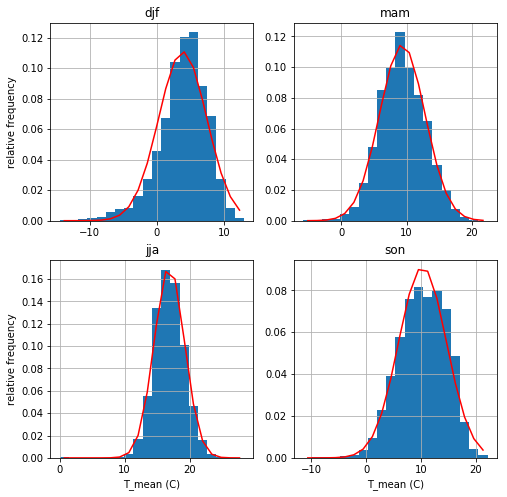

In [15]:
key_list = ["djf", "mam", "jja", "son"]
df_list = [season_dict[key] for key in key_list]
#
# set up a 2 row, 2 column grid of figures, and
# turn the ax_array 2-d array into a list
#
fig, ax_array = plt.subplots(2, 2, figsize=(8, 8))
ax_list = ax_array.flatten()
#
# here is the variable we want to histogram
#
var = "T_mean (C)"
#
# store the fit parameters in a dictionary
# called temp_params for future reference
#
temp_params = dict()
#
#  loop over the four seasons in key_list
#  getting the figure axis and the dataframe
#  for that season.  
#
for index, key in enumerate(key_list):
    the_ax = ax_list[index]
    the_df = df_list[index]
    the_temps = the_df[var]
    #
    # find the mean and standard deviation to
    # set the pdf mu, sigma parameters
    #
    mu, sigma = st.norm.fit(the_temps)
    #
    # save the parameter pair for that season
    #
    temp_params[key] = (mu, sigma)
    #
    # get the histogram values, the bin edges and the plotting
    # bars (patches) for the histogram, specifying 20 bins
    # note that we can specify the histogram variable by it's dataframe
    # column name when we pass the dataframe to matplotlib via
    # the data keyword
    #
    vals, bins, patches = the_ax.hist(var, bins=20, data=the_df, density=True)
    #
    # turn the bin edges into bin centers by averaging the right + left
    # edge of every bin
    #
    bin_centers = (bins[1:] + bins[0:-1]) / 2.0
    #
    # plot the pdf function on top of the histogram as a red line
    #
    the_ax.plot(bin_centers, st.norm.pdf(bin_centers, mu, sigma), "r-")
    the_ax.grid(True)
    the_ax.set(title=key)
    #
    # label the xaxis for the bottom two plots (2 and 3)
    # and the yaxis for the left plots (0 and 2)
    #
    if index > 1:
        the_ax.set(xlabel=var)
    if index in [0,2]:
        the_ax.set(ylabel='relative frequency')

### Daily average total precipitation

Precipitation data is a different story.  Because negative precipitation
is impossible, there is no way a normal distribution is going to work
to represent the variablity.  Instead we use
[scipy.stats.expon.fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon) to fit an exponential distribution.

\begin{align*}
f(y) &= \exp(-y)\\
y &= (x - loc) / scale
\end{align*}


where `loc` is the minimum of the data and `scale` is the distance
between the minimum and the mean.

The fits are not quite as good -- but do capture the one-sided nature
of the variability.  No comments on this one, but it's a copy and paste of
the temperature grid plot above.

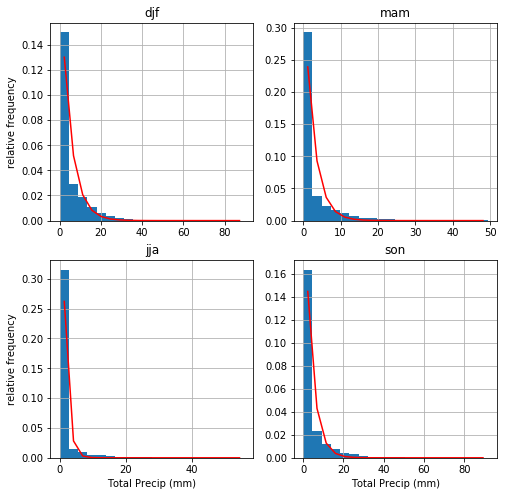

In [16]:
fig, ax_array = plt.subplots(2, 2, figsize=(8, 8))
ax_list = ax_array.flatten()
var = "Total Precip (mm)"
precip_params = dict()
for index, key in enumerate(key_list):
    the_ax = ax_list[index]
    the_df = df_list[index]
    the_precip = the_df[var]
    loc, scale = st.expon.fit(the_precip)
    precip_params[key] = (loc, scale)
    vals, bins, patches = the_ax.hist(var, bins=20, data=the_df, density=True)
    bin_centers = (bins[1:] + bins[0:-1]) / 2.0
    the_ax.plot(bin_centers, st.expon.pdf(bin_centers, loc, scale), "r-")
    the_ax.grid(True)
    the_ax.set(title=key)
    #
    # label the xaxis for the bottom two plots (2 and 3)
    # and the yaxis for the left plots (0 and 2)
    #
    if index > 1:
        the_ax.set(xlabel=var)
    if index in [0,2]:
        the_ax.set(ylabel='relative frequency')   

## Saving the fit parameters

We have two new dictionaries: `temp_params` and `precip_params` that
we should save for the future.

In [17]:
data_dict = dict()
data_dict[
    "metadata"
] = """
          loc,scale tuples for daily average temperature (deg C)
          and precipitation (mm) produced by 11-pandas4 for YVR
          """
data_dict["temp"] = temp_params
data_dict["precip"] = precip_params
fit_file = context.processed_dir / "fit_metadata.json"
with open(fit_file, "w") as f:
    json.dump(data_dict, f, indent=4)
    
print(f"wrote the fit coefficients to {fit_file}")

wrote the fit coefficients to /Users/phil/repos/eosc213_students/notebooks/pandas/data/processed/fit_metadata.json


In [18]:
#
# here's what the file looks like:
#

with open(fit_file,'r') as f:
    print(f.read())

{
    "metadata": "\n          loc,scale tuples for daily average temperature (deg C)\n          and precipitation (mm) produced by 11-pandas4 for YVR\n          ",
    "temp": {
        "djf": [
            3.84256591465072,
            3.595365405560527
        ],
        "mam": [
            9.356482721671577,
            3.4789191637037504
        ],
        "jja": [
            16.88648212846009,
            2.324995343255562
        ],
        "son": [
            10.308878631550368,
            4.372545963729551
        ]
    },
    "precip": {
        "djf": [
            0.0,
            4.8432998097309055
        ],
        "mam": [
            0.0,
            2.6093758371283147
        ],
        "jja": [
            0.0,
            1.2523918301531844
        ],
        "son": [
            0.0,
            3.770662503393972
        ]
    }
}


## Grouping by decade

The two functions below take a season dataframe and
create a new column with the decade that each day belongs
to.  For example if a measurement in taken in 1941, then
its decade is 194.  We can use that see whether the temperature
at the airport has been increasing since the 1930's and whether
that increase depends on season

In [19]:
def find_decade(row):
    """
    given a row from an Environment Canada dataframe
    return the first 3 digits of the year as an integer
    
    i.e. turn "2010" into the number 201
    """
    year_string=f"{row['Year']:4d}"
    return int(year_string[:3])


def decadal_groups(season_df):
    """
    given a season dataframe produced by groupby('season'), add
    a column called 'decade' with the 3 digit decade
    and return a groupby dictionary of decade dataframes for that
    season with the decade as key
    """
    #
    # add the decade column to the dataframe using apply
    #
    decade=season_df.apply(find_decade,axis=1)
    season_df['decade']=decade
    #
    # do the groupby and turn into a dictionary
    #
    decade_groups=season_df.groupby('decade')
    decade_dict={key:value for key,value in decade_groups}
    return decade_dict

## Finding the median temperature

Once we have the dictionary that has the decade as key and
the dataframe for that decade as value, we can find the median
value of the daily average temperature for each decade using
the `median_temps` function below.

In [20]:
def median_temps(decade_dict):
    """
    given a decade_dict produced by the decadal_temp function
    return a 2-column numpy array.  The first column should be the
    integer decade (193,194,etc.) and the second column should be
    the median temperature for that decade
    """
    values=list()
    for the_decade,the_df in decade_dict.items():
        T_median=the_df['T_mean (C)'].median()
        values.append((the_decade,T_median))
    result=np.array(values)
    return result



## Assignment

Using the functions above, calculate the median temperature for
each decade and save your (decade, temperature) lists into
a dictionary with a key for each season.  Use that dictionary
to make a 2 x 2 plot of temperature vs. decade for each of the
four seasons, using the 4 box plotting code above.  (My solution
is 14 lines long)

In [21]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 